In [1]:
import pandas as pd
import numpy as np


#### Timestamp

In [2]:
pd.Timestamp('9 Jun 2017 10:30AM')

Timestamp('2017-06-09 10:30:00')

#### Period

In [3]:
pd.Period('Jan 2017')

Period('2017-01', 'M')

In [4]:
pd.Period('22 Nov 1978')

Period('1978-11-22', 'D')

#### DatetimeIndex

In [7]:
t1 = pd.Series(list('abc'),[pd.Timestamp('01 Sep 2016'),pd.Timestamp('03 Sep 2016'),pd.Timestamp('03 Sep 2016')])
t1

2016-09-01    a
2016-09-03    b
2016-09-03    c
dtype: object

In [8]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [12]:
t2 = pd.Series(list('def'), [pd.Period('Sep 2016'),pd.Period('Oct 2016'),pd.Period('Nov 2016')])
type(t2.index)

pandas.core.indexes.period.PeriodIndex

In [27]:
d1=['2 Jun 2013','Aug 14, 2016','2015-06-23','7 Dec 16']
ts3=pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1,columns=list('ab'))
ts3

,a,b
2 Jun 2013,36,32
"Aug 14, 2016",10,74
2015-06-23,43,13
7 Dec 16,41,93


In [30]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,36,32
2016-08-14,10,74
2015-06-23,43,13
2016-12-07,41,93


Time deltas

In [32]:
pd.Timestamp('9 Sep 2016')-pd.Timestamp('18 Sep 2016')

Timedelta('-9 days +00:00:00')

In [33]:
pd.Timestamp('10 Nov 2016')+pd.Timedelta('12D 3H')

Timestamp('2016-11-22 03:00:00')

#### working with Dates in a Dataframe

In [35]:
dates = pd.date_range('1 Oct 2016', periods=9, freq = '2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [37]:
df = pd.DataFrame({'Count1':100 + np.random.randint(-5,10,9).cumsum(),
                  'Count2':120 + np.random.randint(-5,10,9)},index=dates)
df

,Count1,Count2
2016-10-02,105,129
2016-10-16,112,128
2016-10-30,112,124
2016-11-13,109,121
2016-11-27,118,124
2016-12-11,126,123
2016-12-25,129,128
2017-01-08,137,118
2017-01-22,133,128


In [38]:
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [39]:
df.diff()

,Count1,Count2
2016-10-02,NaN,NaN
2016-10-16,7.0,-1.0
2016-10-30,0.0,-4.0
2016-11-13,-3.0,-3.0
2016-11-27,9.0,3.0
2016-12-11,8.0,-1.0
2016-12-25,3.0,5.0
2017-01-08,8.0,-10.0
2017-01-22,-4.0,10.0


In [40]:
df.resample('M').mean()

,Count1,Count2
2016-10-31,109.666667,127.0
2016-11-30,113.500000,122.5
2016-12-31,127.500000,125.5
2017-01-31,135.000000,123.0


In [41]:
df['2017']

,Count1,Count2
2017-01-08,137,118
2017-01-22,133,128


In [42]:
df['2016-12']

,Count1,Count2
2016-12-11,126,123
2016-12-25,129,128


In [43]:
df['2016-12':]

,Count1,Count2
2016-12-11,126,123
2016-12-25,129,128
2017-01-08,137,118
2017-01-22,133,128


In [44]:
df.asfreq('W',method='ffill')

,Count1,Count2
2016-10-02,105,129
2016-10-09,105,129
2016-10-16,112,128
2016-10-23,112,128
2016-10-30,112,124
2016-11-06,112,124
2016-11-13,109,121
2016-11-20,109,121
2016-11-27,118,124
2016-12-04,118,124


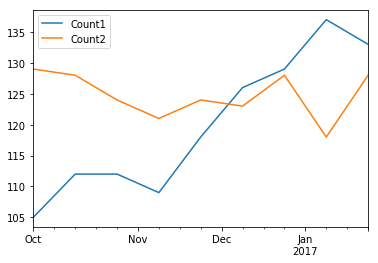

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()